# CapsNets on Mnist dataset

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

In [38]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_mnist

## Loading dataset and normalising

In [39]:
(X_train, y_train), (X_test , y_test) = load_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [40]:
classes = np.arange(10)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

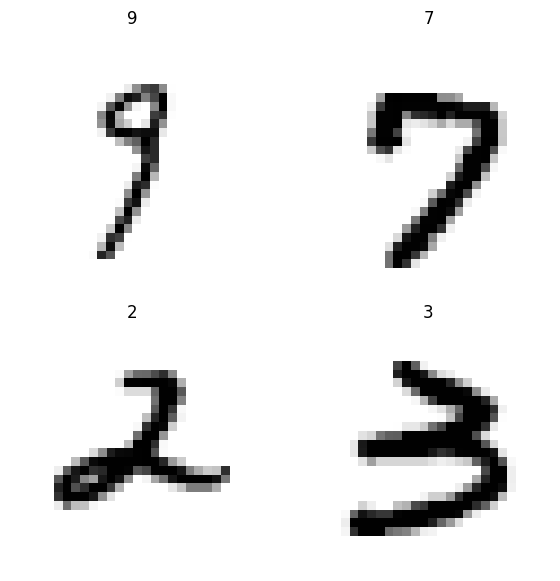

In [41]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Build CapsNet model

In [42]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [45]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model._name = 'CapsNet-MNIST'
model.compile()
model.summary()

Model: "CapsNet-MNIST"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'])

Epoch 10/10: 100%|██████████| 16/16 [00:05<00:00,  2.72it/s, Loss : 0.0002] 


{'accuracy': ListWrapper([0.8046875, 0.8974609375, 0.9482421875, 0.96484375, 0.9833984375, 0.9873046875, 0.9931640625, 0.994140625, 0.9970703125, 0.998046875]),
 'precision': ListWrapper([0.8213710533810229, 0.9028898397718782, 0.9491521734037711, 0.9660370551913149, 0.9836695417959603, 0.9875264098058085, 0.9932497919375447, 0.994207206153231, 0.9971181832107843, 0.9980851715686274]),
 'recall': ListWrapper([0.8046875, 0.8974609375, 0.9482421875, 0.96484375, 0.9833984375, 0.9873046875, 0.9931640625, 0.994140625, 0.9970703125, 0.998046875]),
 'f1': ListWrapper([0.8003497923077043, 0.8969228221109777, 0.9481400067617146, 0.964904234128359, 0.9833834578670904, 0.9873017578340147, 0.9931725944481539, 0.9941445244677672, 0.9970747057998188, 0.9980515311770161]),
 'loss': ListWrapper([0.007249862886965275, 0.002789976540952921, 0.001739715225994587, 0.0011598990531638265, 0.0008479017415083945, 0.0005994180683046579, 0.00045186784700490534, 0.0003656516782939434, 0.0002782410301733762, 0.00

In [47]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


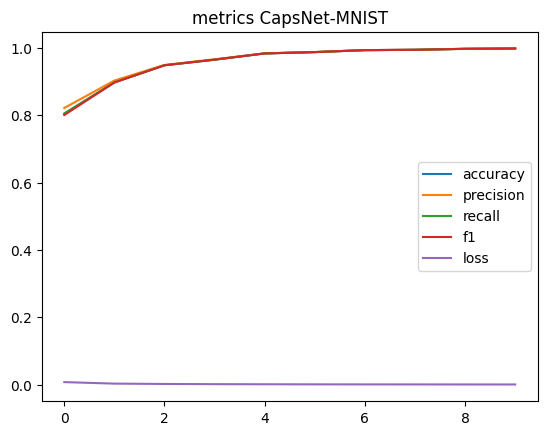

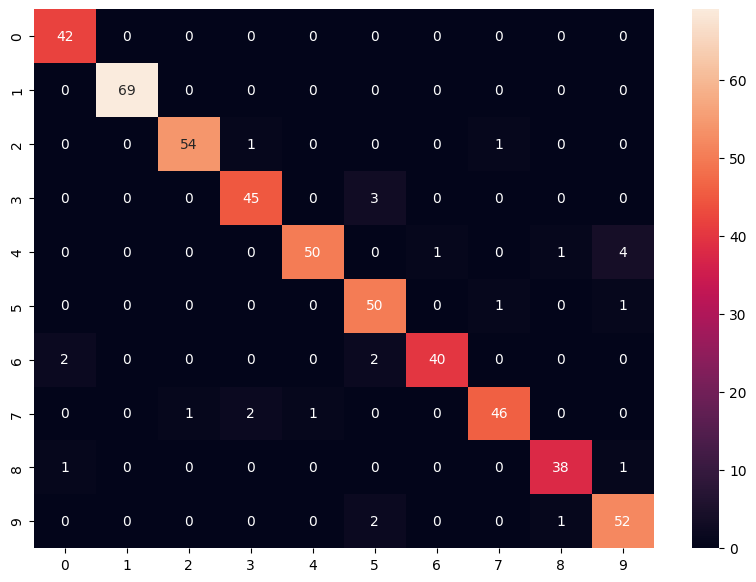

In [48]:
model.save(evaluate=(X_test, y_test), classes=np.arange(10))

In [49]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense_4 (Dense)             multiple                  82432     
                                                                 
 dense_5 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________


In [115]:
import time

n_runs = 100
inference_time = 0
indexes = np.random.randint(len(X_test), size=n_runs)

for i in range(100):
    start = time.time()
    y_preds = model.predict(X_test[indexes[i]])
    end = time.time()
    inference_time += end - start

inference_time /= n_runs

print(f"Average Inference Time: {inference_time:.5f} seconds")

Average Inference Time: 0.00331 seconds
